In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df_training = pd.read_csv('./training_dataset.csv')
df_validation = pd.read_csv('./validation_dataset.csv')
df_test = pd.read_csv('./test_dataset.csv')

frames = [df_training, df_validation]
df_training = pd.concat(frames)
df_training.shape

(474702, 17)

In [3]:
df_by_code_cause = df_training.groupby(['STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR'])
df_by_code_cause.describe()

FOD_ID                                     \
                                     count          mean           std    min   
STAT_CAUSE_CODE STAT_CAUSE_DESCR                                                
1.0             Lightning         222750.0  4.333687e+07  9.317140e+07    2.0   
6.0             Railroad           26899.0  2.115934e+07  6.501683e+07  116.0   
7.0             Arson             225053.0  3.497797e+07  8.335058e+07   38.0   

                                                                               \
                                       25%        50%        75%          max   
STAT_CAUSE_CODE STAT_CAUSE_DESCR                                                
1.0             Lightning         132720.5   338458.5  1430508.5  300348361.0   
6.0             Railroad          970034.5  1097001.0  1165359.5  300348033.0   
7.0             Arson             555611.0   988866.0  1750846.0  300348354.0   

                                 FIRE_YEAR               ... DISCOVERY_TIME  \
                                     count         mean  ...            75%   
STAT_CAUSE_CODE STAT_CAUSE_DESCR                         ...                  
1.0             Lightning         222750.0  2003.261217  ...         1700.0   
6.0             Railroad           26899.0  2000.083683  ...         1557.0   
7.0             Arson             225053.0  2002.621542  ...         1616.0   

                                         CONT_TIME                           \
                                     max     count         mean         std   
STAT_CAUSE_CODE STAT_CAUSE_DESCR                                              
1.0             Lightning         2359.0  222750.0  1553.153652  445.618970   
6.0             Railroad          2359.0   26899.0  1581.668538  459.410582   
7.0             Arson             2359.0  225053.0  1577.420452  487.935677   

                                                                       
                                  min     25%     50%     75%     max  
STAT_CAUSE_CODE STAT_CAUSE_DESCR                                       
1.0             Lightning         0.0  1247.0  1620.0  1845.0  2359.0  
6.0             Railroad          0.0  1351.0  1630.0  1900.0  2359.0  
7.0             Arson             0.0  1350.0  1631.0  1900.0  2359.0  

[3 rows x 56 columns]

## Fire Cause analysis

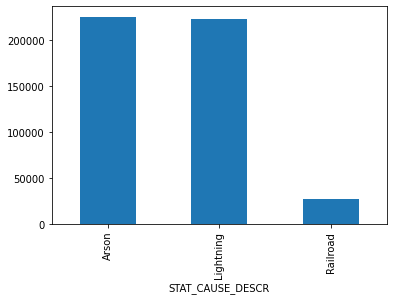

In [4]:
_ = df_training.groupby(['STAT_CAUSE_DESCR']).size().plot(kind = "bar") 

In [5]:
le = preprocessing.LabelEncoder()

df_training['DISCOVERY_DATE_NEW'] = df_training['DISCOVERY_DATE']
df_training['D1'] = pd.to_datetime(df_training['DISCOVERY_DATE_NEW'])
df_training['D2'] = pd.to_datetime(df_training['CONT_DATE'])

df_training['STATE'] = le.fit_transform(df_training['STATE'])
df_training['NWCG_REPORTING_AGENCY'] = le.fit_transform(df_training['NWCG_REPORTING_AGENCY'])
df_training['SOURCE_REPORTING_UNIT_NAME'] = le.fit_transform(df_training['SOURCE_REPORTING_UNIT_NAME'])
df_training['FIRE_SIZE_CLASS'] = le.fit_transform(df_training['FIRE_SIZE_CLASS'])
df_training['OWNER_DESCR'] = le.fit_transform(df_training['OWNER_DESCR'])
df_training['DISC_DATE'] = le.fit_transform(df_training['DISCOVERY_DATE'])
df_training['CONTAINED_DATE'] = le.fit_transform(df_training['CONT_DATE'])
df_training['FIRE_TIME'] = (df_training['D2'] - df_training['D1']).dt.days
df_training['MONTH'] = pd.DatetimeIndex(df_training['DISCOVERY_DATE_NEW']).month
df_training['WEEK_DAY'] = df_training['D1'].dt.weekday

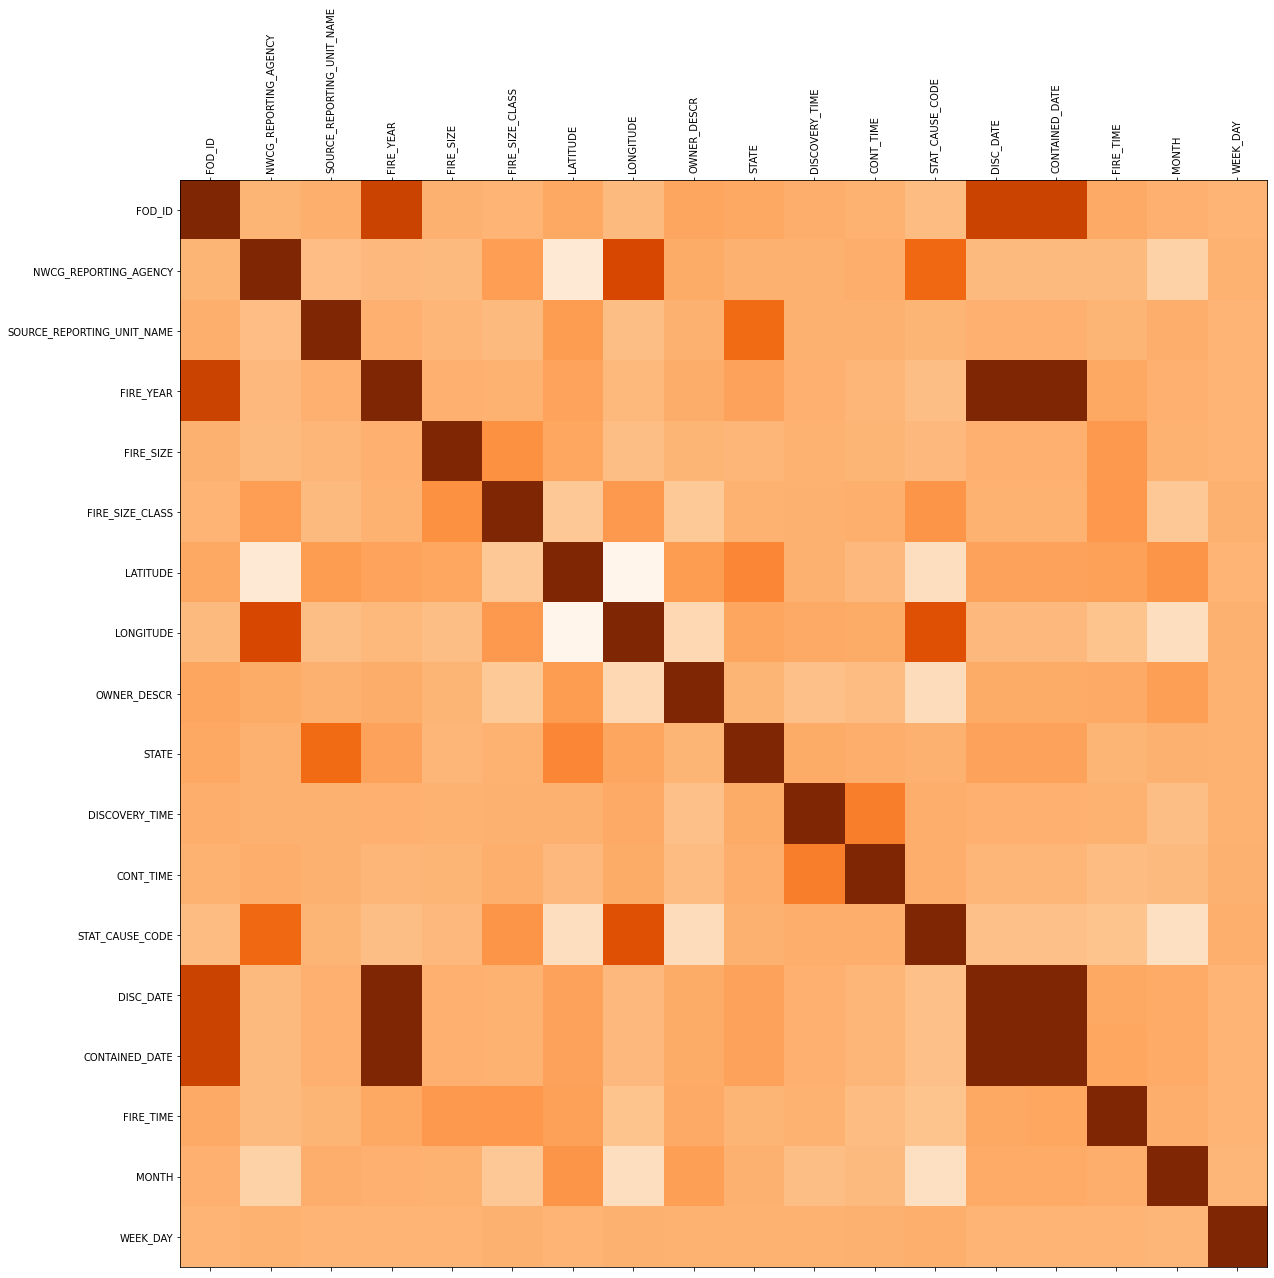

In [6]:
import matplotlib.pyplot as plt
corr = df_training.corr()  #the default method is pearson
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr,cmap=plt.cm.Oranges)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)    
plt.show()

In [7]:
f1 = df_training.FIRE_YEAR

f2 = df_training.FIRE_SIZE

f3 = df_training.LATITUDE
f4 = df_training.LONGITUDE

le = preprocessing.LabelEncoder()
f5 = le.fit_transform(df_training.STATE)

df_training['DISCOVERY_DATE_NEW'] = df_training['DISCOVERY_DATE']
df_training['D1'] = pd.to_datetime(df_training['DISCOVERY_DATE_NEW'])

df_training['D2'] = pd.to_datetime(df_training['CONT_DATE'])

df_training['FIRE_TIME'] = (df_training['D2'] - df_training['D1']).dt.days
f6 = df_training.FIRE_TIME

le = preprocessing.LabelEncoder()
f7 = le.fit_transform(df_training.DISCOVERY_DATE)

le = preprocessing.LabelEncoder()
f8 = le.fit_transform(df_training.CONT_DATE)

df_training['WEEK_DAY'] = df_training['D1'].dt.weekday
f9 = df_training.WEEK_DAY

le = preprocessing.LabelEncoder()
f10 = le.fit_transform(df_training.NWCG_REPORTING_AGENCY)

df_training['MONTH'] = pd.DatetimeIndex(df_training['DISCOVERY_DATE_NEW']).month
f11 = df_training.MONTH

In [8]:
X = list(zip(f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11))
y = [df_training.STAT_CAUSE_DESCR]

In [9]:
X = np.array(X)

y = np.array(y)
y.reshape(-1, 1)
y = y.transpose()

In [10]:
tf1 = df_test.FIRE_YEAR

tf2 = df_test.FIRE_SIZE

tf3 = df_test.LATITUDE
tf4 = df_test.LONGITUDE

le = preprocessing.LabelEncoder()
tf5 = le.fit_transform(df_test.STATE)

df_test['DISCOVERY_DATE_NEW'] = df_test['DISCOVERY_DATE']
df_test['D1'] = pd.to_datetime(df_test['DISCOVERY_DATE_NEW'])

df_test['D2'] = pd.to_datetime(df_test['CONT_DATE'])

df_test['FIRE_TIME'] = (df_test['D2'] - df_test['D1']).dt.days
tf6 = df_test.FIRE_TIME

le = preprocessing.LabelEncoder()
tf7 = le.fit_transform(df_test.DISCOVERY_DATE)

le = preprocessing.LabelEncoder()
tf8 = le.fit_transform(df_test.CONT_DATE)

df_test['WEEK_DAY'] = df_test['D1'].dt.weekday
tf9 = df_test.WEEK_DAY

le = preprocessing.LabelEncoder()
tf10 = le.fit_transform(df_test.NWCG_REPORTING_AGENCY)

df_test['MONTH'] = pd.DatetimeIndex(df_test['DISCOVERY_DATE_NEW']).month
tf11 = df_test.MONTH

In [11]:
X_test = list(zip(tf1, tf2, tf3, tf4, tf5, tf6, tf7, tf8, tf9, tf10, tf11))
y_test = [df_test.STAT_CAUSE_DESCR]

In [12]:
X_test = np.array(X_test)

y_test = np.array(y_test)
y_test.reshape(-1, 1)
y_test = y_test.transpose()

In [13]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier()

params = {'learning_rate': [0.2], 'max_depth': [8, 10], 'n_estimators': [300]}

random_search_cv = RandomizedSearchCV(xgb_clf, params, scoring='f1_micro', cv=3)
_ = random_search_cv.fit(X, y.ravel())

/Users/vidita/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [14]:
y_pred = random_search_cv.predict(X_test)

In [15]:
random_search_cv.best_estimator_

XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=300,
              objective='multi:softprob')

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9088021166874516


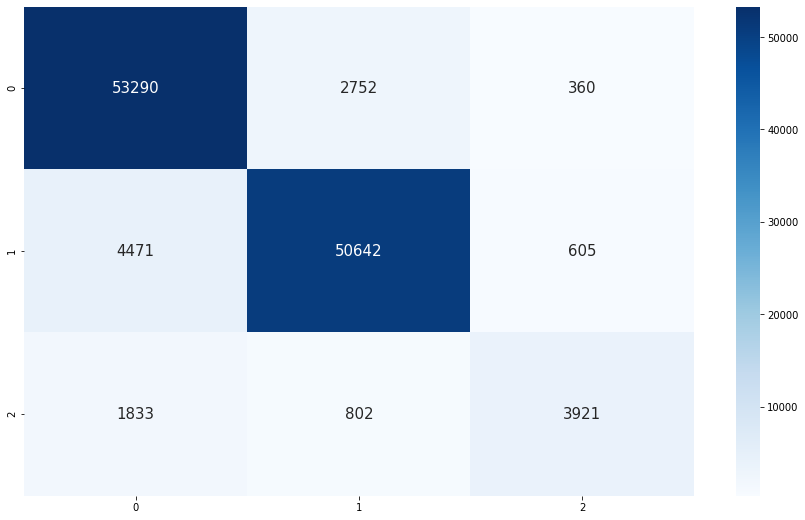

In [17]:
## Compute Confusion Matrix and plot heatmap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 9))
_ = sn.heatmap(cm, annot=True, annot_kws={"size": 15}, cmap='Blues', fmt='g')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Arson       0.89      0.94      0.92     56402
   Lightning       0.93      0.91      0.92     55718
    Railroad       0.80      0.60      0.69      6556

    accuracy                           0.91    118676
   macro avg       0.88      0.82      0.84    118676
weighted avg       0.91      0.91      0.91    118676

